# Poisson Equation
## The Differential Equation
$$  \frac{\partial^2 u}{\partial y^2} + \frac{\partial^2 u}{\partial x^2}=f(x,y)$$

$$  \frac{\partial^2 u}{\partial y^2} + \frac{\partial^2 u}{\partial x^2}=x+y$$


## Boundary Condition
$$ u(x,0)=x(x-1), $$
$$ u(x,1)=x(x-1), $$
$$ u(0,y)=y(y-1), $$
$$ u(1,y)=y(y-1), $$

## The Difference Equation
$$ w[i-1,j]+ w[i,j-1] -4w[i,j]+w[i,j+1]+w[i+1,j]=h^2(x_i+y_j)$$


In [4]:
# LIBRARY
# vector manipulation
import numpy as np
# math functions
import math 

# THIS IS FOR PLOTTING

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")


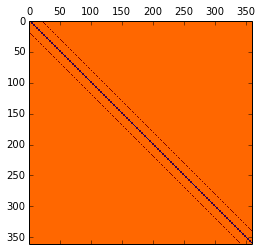

[[-4.  1.  0. ...,  0.  0.  0.]
 [ 1. -4.  1. ...,  0.  0.  0.]
 [ 0.  1. -4. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ..., -4.  1.  0.]
 [ 0.  0.  0. ...,  1. -4.  1.]
 [ 0.  0.  0. ...,  0.  1. -4.]]


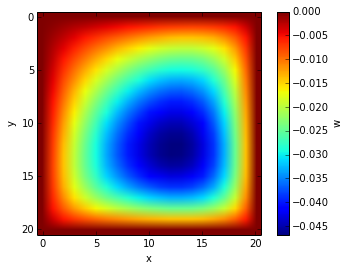

"\n    \n\n\nprint(w[:,1])\nprint(A)\nprint(B)\nprint(w[:,2])\nprint(w[:,3])\nprint(w[:,4])\nprint(w[:,5])\nprint(time)\nfig = plt.figure(figsize=(8,4))\nplt.plot(w)\nplt.xlabel('x')\nplt.ylabel('w')\n\n\n"

In [47]:
N=21
h=1/(N-1)


x=np.arange(0,1.0001,h)
y=np.arange(0,1.0001,h)

N2=(N-2)*(N-2)
A=np.zeros((N2,N2))
C=np.zeros((N,N))


f=np.zeros(N2)

w=np.zeros(N2)

b=np.zeros(N2)


     

for i in range (0,N):
        C[i,0]=0#x[i]*(1-x[i]) #left Boundary
        C[i,N-1]=0#x[i]*(1-x[i]) #Right Boundary

for j in range (0,N):
        C[0,j]=0#y[j]*(1-y[j]) #Lower Boundary
        C[N-1,j]=0#y[j]*(1-y[j]) #Upper Boundary
        
for i in range (0,N-2):
        b[i]=0#x[i+1]*(1-x[i+1]) #left Boundary
        b[i+(N-2)*(N-3)]=0#x[i+1]*(1-x[i+1]) # Right Boundary

        
for j in range (0,N-2):
        b[(N-2)*j]=0#b[(N-2)*j]+y[j+1]*(1-y[j+1]) # Lower Boundary
        b[N-3+(N-2)*j]=0#b[N-3+(N-2)*j]+y[j+1]*(1-y[j+1]) # Upper Boundary

                          

for i in range (0,N-2):
    for j in range (0,N-2):           
        A[i+(N-2)*j,i+(N-2)*j]=-4
        f[i+(N-2)*j]=h*h*(x[i+1]**2+y[j+1]**2)


        
for i in range (1,N-2):
    for j in range (0,N-2):           
        A[i+(N-2)*j,i+(N-2)*j-1]=1

for i in range (0,N-3):
    for j in range (0,N-2):           
        A[i+(N-2)*j,i+(N-2)*j+1]=1
      
for i in range (0,N-2):
    for j in range (0,N-3):           
        A[i+(N-2)*j,i+(N-2)*(j+1)]=1
      

for i in range (0,N-2):
    for j in range (1,N-2):           
        A[i+(N-2)*j,i+(N-2)*(j-1)]=1


fig = plt.figure(figsize=(8,4))
plt.matshow(A)
plt.show()
print(A)
Ainv=np.linalg.inv(A)

w=np.dot(Ainv,f-b)
#print(x)
#print(y)
#print(f)
#print(b)
#print(f-b)


C[1:N-1,1:N-1]=w.reshape((N-2,N-2))
fig = plt.figure()
plt.imshow(C.transpose())
#plt.xticks(np.arange(len(x)), x)
#plt.yticks(np.arange(len(y)), y)
plt.xlabel('x')
plt.ylabel('y')
clb=plt.colorbar()
clb.set_label('w')

plt.show()

'''
    


print(w[:,1])
print(A)
print(B)
print(w[:,2])
print(w[:,3])
print(w[:,4])
print(w[:,5])
print(time)
fig = plt.figure(figsize=(8,4))
plt.plot(w)
plt.xlabel('x')
plt.ylabel('w')


'''